In [2]:
import pandas as pd

In [3]:
labels_df = pd.read_csv('pilotnet_data.csv')

In [4]:
labels_df

,rgb_path,seg_path,curvarade,steer,throttle,brake,throttle_bin
0,dataset_dagger/dataset_03/imageRGB/frame_10799...,dataset_dagger/dataset_03/imageSEG/frame_10799...,Curva,-0.577775,0.030553,0.0,"(0.0, 0.04]"
1,dataset_dagger/dataset_03/imageRGB/frame_10794...,dataset_dagger/dataset_03/imageSEG/frame_10794...,Curva,-0.577775,0.030553,0.0,"(0.0, 0.04]"
2,dataset_dagger/dataset_03/imageRGB/frame_10799...,dataset_dagger/dataset_03/imageSEG/frame_10799...,Curva,-0.577775,0.030553,0.0,"(0.0, 0.04]"
3,dataset_dagger/dataset_03/imageRGB/frame_10794...,dataset_dagger/dataset_03/imageSEG/frame_10794...,Curva,-0.577775,0.030553,0.0,"(0.0, 0.04]"
4,dataset_dagger/dataset_03/imageRGB/frame_10799...,dataset_dagger/dataset_03/imageSEG/frame_10799...,Curva,-0.577775,0.030553,0.0,"(0.0, 0.04]"
...,...,...,...,...,...,...,...
74625,dataset_dagger/dataset_30/imageRGB/frame_36295...,dataset_dagger/dataset_30/imageSEG/frame_36295...,Curva,-0.600000,0.100000,0.0,"(0.08, 0.12]"
74626,dataset_dagger/dataset_20/imageRGB/frame_28073...,dataset_dagger/dataset_20/imageSEG/frame_28073...,Recta,-0.300000,0.100000,0.0,"(0.08, 0.12]"
74627,dataset_dagger/dataset_30/imageRGB/frame_11885...,dataset_dagger/dataset_30/imageSEG/frame_11885...,Curva,-0.600000,0.100000,0.7,"(0.08, 0.12]"
74628,dataset_dagger/dataset_14/imageRGB/frame_68691...,dataset_dagger/dataset_14/imageSEG/frame_68691...,Curva,0.600000,0.100000,0.0,"(0.08, 0.12]"


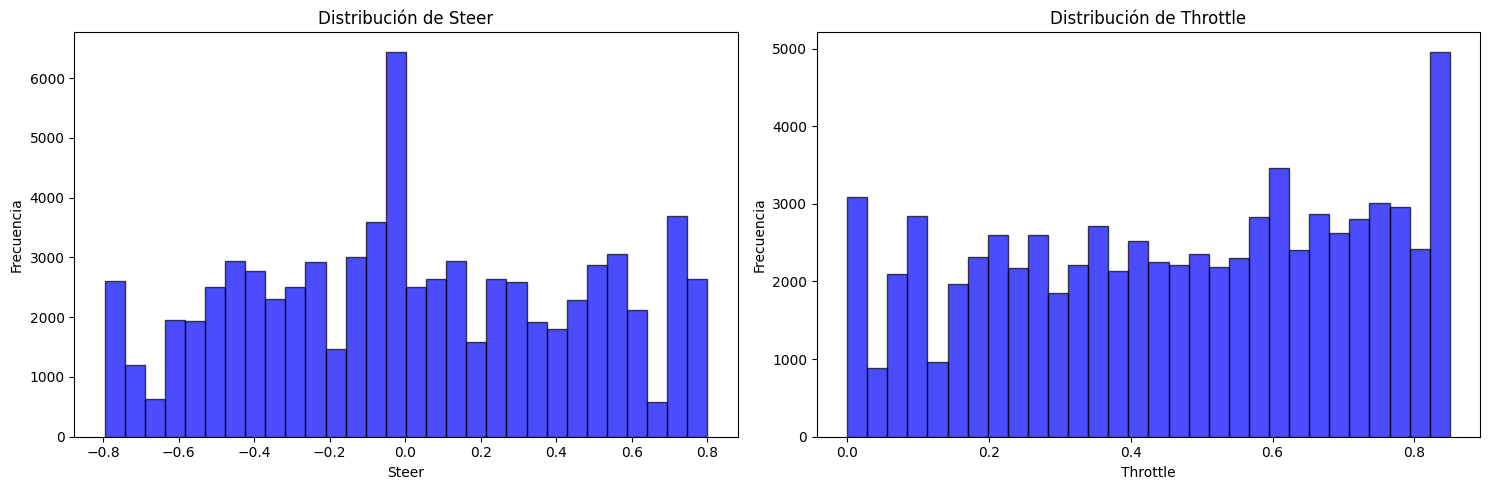

In [6]:
import matplotlib.pyplot as plt

def plot_histograms(df, bins=30):
    """
    Genera histogramas de las columnas 'steer', 'brake', y 'throttle'.
    
    Args:
        df (pandas.DataFrame): DataFrame con las columnas de interés.
        bins (int): Número de bins para el histograma.
    """
    # Asegurarse de que las columnas existan en el DataFrame
    required_columns = ['steer', 'brake', 'throttle']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"El DataFrame no contiene la columna requerida: {col}")
    
    # Crear histogramas
    plt.figure(figsize=(15, 5))

    # Histograma de steer
    plt.subplot(1, 2, 1)
    plt.hist(df['steer'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    plt.title('Distribución de Steer')
    plt.xlabel('Steer')
    plt.ylabel('Frecuencia')

    # Histograma de brake
    # plt.subplot(1, 3, 2)
    # plt.hist(df['brake'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    # plt.title('Distribución de Brake')
    # plt.xlabel('Brake')
    # plt.ylabel('Frecuencia')

    # Histograma de throttle
    plt.subplot(1, 2, 2)
    plt.hist(df['throttle'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    plt.title('Distribución de Throttle')
    plt.xlabel('Throttle')
    plt.ylabel('Frecuencia')

    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con tu DataFrame
import pandas as pd
plot_histograms(labels_df, bins=30)


In [7]:
df = labels_df

In [8]:
from collections import Counter

# Redondear los valores para agrupar por bins
df['steer_bin'] = (df['steer'] * 10).round() / 10
df['throttle_bin'] = (df['throttle'] * 10).round() / 10

# Crear una columna de tuplas para ver la distribución conjunta
df['tuple_bin'] = list(zip(df['steer_bin'], df['throttle_bin']))

Counter(df['tuple_bin'])  # ← esto te da la distribución real combinada


Counter({(-0.0, 0.4): 1191,
         (-0.0, 0.3): 1169,
         (-0.5, 0.8): 1114,
         (-0.0, 0.6): 1092,
         (-0.0, 0.5): 1047,
         (-0.0, 0.2): 1025,
         (-0.0, 0.7): 1024,
         (0.6, 0.1): 1020,
         (-0.5, 0.7): 971,
         (-0.6, 0.1): 956,
         (-0.1, 0.4): 918,
         (-0.0, 0.8): 904,
         (0.5, 0.6): 873,
         (-0.1, 0.3): 865,
         (-0.4, 0.8): 865,
         (0.6, 0.7): 863,
         (-0.5, 0.5): 851,
         (-0.1, 0.2): 810,
         (-0.1, 0.5): 805,
         (-0.2, 0.7): 794,
         (0.5, 0.7): 780,
         (0.7, 0.8): 767,
         (0.2, 0.8): 757,
         (-0.8, 0.4): 735,
         (-0.1, 0.7): 725,
         (0.7, 0.6): 703,
         (0.1, 0.4): 701,
         (0.3, 0.6): 697,
         (0.5, 0.5): 691,
         (-0.1, 0.6): 687,
         (0.7, 0.2): 685,
         (0.1, 0.7): 683,
         (0.2, 0.6): 672,
         (0.1, 0.2): 671,
         (-0.8, 0.8): 669,
         (-0.3, 0.8): 662,
         (0.1, 0.5): 659,
        

In [9]:
import pandas as pd
import numpy as np

# Suponiendo que ya tienes un DataFrame llamado labels_df
df = labels_df.copy()

# Redondear a bins de 0.1
df['steer_bin'] = (df['steer'] / 0.1).round(0) * 0.1
df['throttle_bin'] = (df['throttle'] / 0.1).round(0) * 0.1


In [10]:
grouped = df.groupby(['steer_bin', 'throttle_bin']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='steer_bin', columns='throttle_bin', values='count').fillna(0)


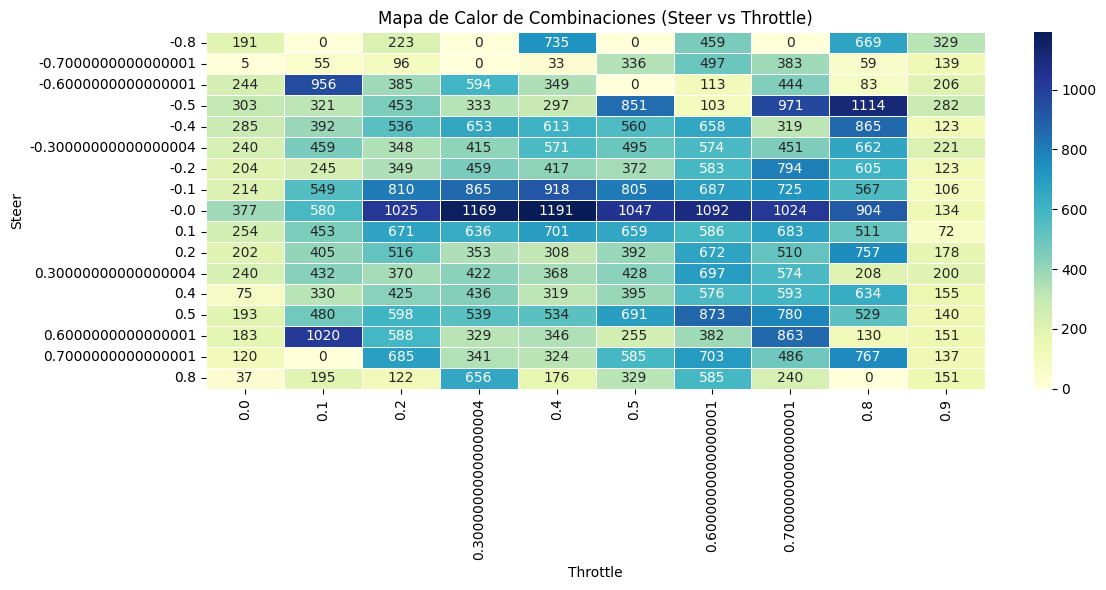

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Mapa de Calor de Combinaciones (Steer vs Throttle)")
plt.xlabel("Throttle")
plt.ylabel("Steer")
plt.tight_layout()
plt.show()
